# 可視化(part 2)

近年、`Seaborn`や`Plotly`など`matplotlib`の機能を補完するような形態のライブラリ拡張するために広く利用されています。これらのライブラリはデータの可視化をより直感的かつ簡単に行うためのツールを提供しており、`matplotlib`単体では実現しにくい高度なグラフィックやインタラクティブなプロットを作成することが可能です。

## Seaborn

`Seaborn`は`matplotlib`の上に構築されているデータ可視化ライブラリで、複雑なグラフを簡単に作成するための高レベルのインターフェースを提供します。

- 散布図、棒グラフ、ヒートマップ、箱ひげ図、バイオリンプロット、ペアプロットなど、多様なプロットタイプをサポートしています。
- データフレームとの親和性が高く、データセットの操作やフィルタリング、グループ化などが容易に行えます。
- 統計的なデータ可視化を簡単に行えるように設計されて、統計的なデータ集約や要約を自動的に行う機能を持っています。

In [45]:
#!pip install seaborn

### 基本的な使い方

`Seaborn`は`matplotlib`を補完するものなので、よくこの２つをセットで使います。

In [2]:
#import scienceplots
import matplotlib.pyplot as plt
from matplotlib import font_manager
#plt.style.use(['science','no-latex'])
# Path to your TTF file
ttf_path = './Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf'
# Register the font
font_manager.fontManager.addfont(ttf_path)
custom_font = font_manager.FontProperties(fname=ttf_path)
# Set the custom font as default
plt.rcParams['font.family'] = custom_font.get_name()
plt.rcParams['font.family'] = 'Hiragino Sans'

In [3]:
import pandas as pd
import seaborn as sns

df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")

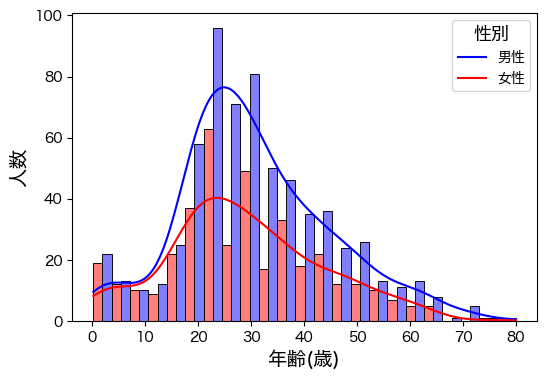

In [4]:
plt.figure(figsize=(6, 4))

ax=sns.histplot(
    data=df,
    x="age",
    kde=True,# カーネル密度推定
    hue="sex",
    multiple="dodge",  # “layer”, “dodge”, “stack”, “fill”
    palette={"male": "blue", "female": "red"},
)

ax.set_xlabel("年齢(歳)",fontsize=14)
ax.set_ylabel("人数",fontsize=14)
ax.legend(title="性別", title_fontsize='13', loc='upper right',labels=['男性', '女性'])

plt.show()



### カテゴリ別のプロット

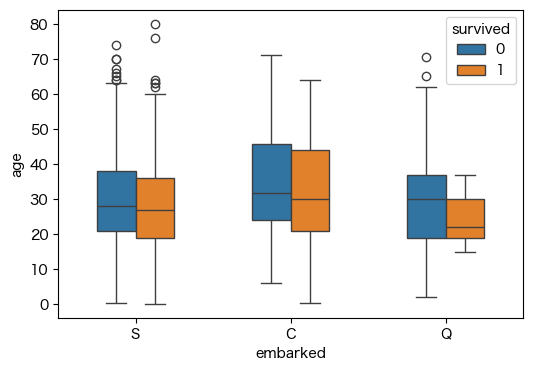

In [5]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=df, x="embarked", y="age", hue="survived",width=.5)

plt.show()

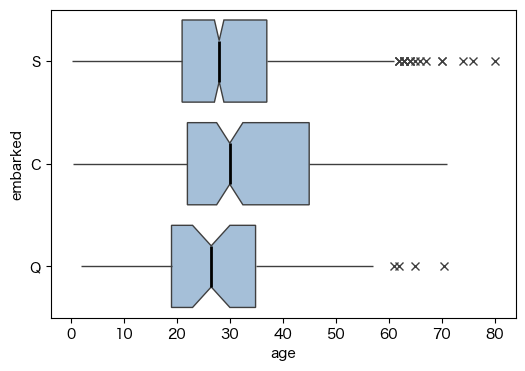

In [6]:
plt.figure(figsize=(6, 4))

ax=sns.boxplot(
    data=df, x="age", y="embarked",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "black", "linewidth": 2},
)

plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

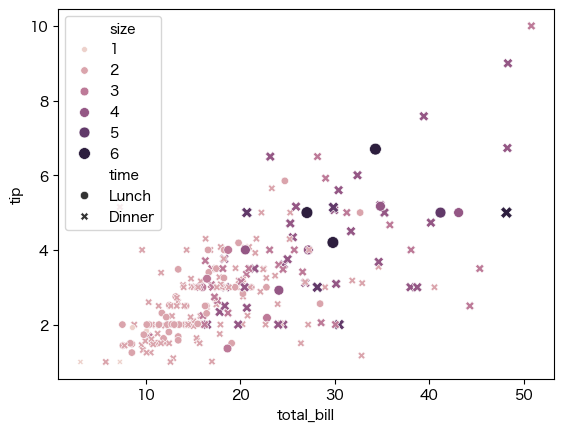

In [13]:
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size="size",style="time")

### 回帰直線

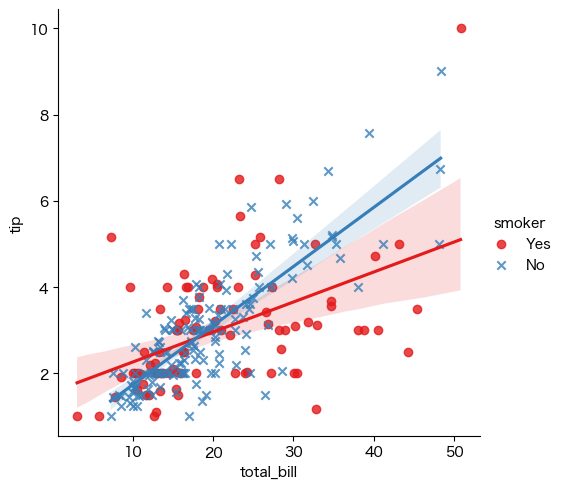

In [7]:
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

<Figure size 600x600 with 0 Axes>

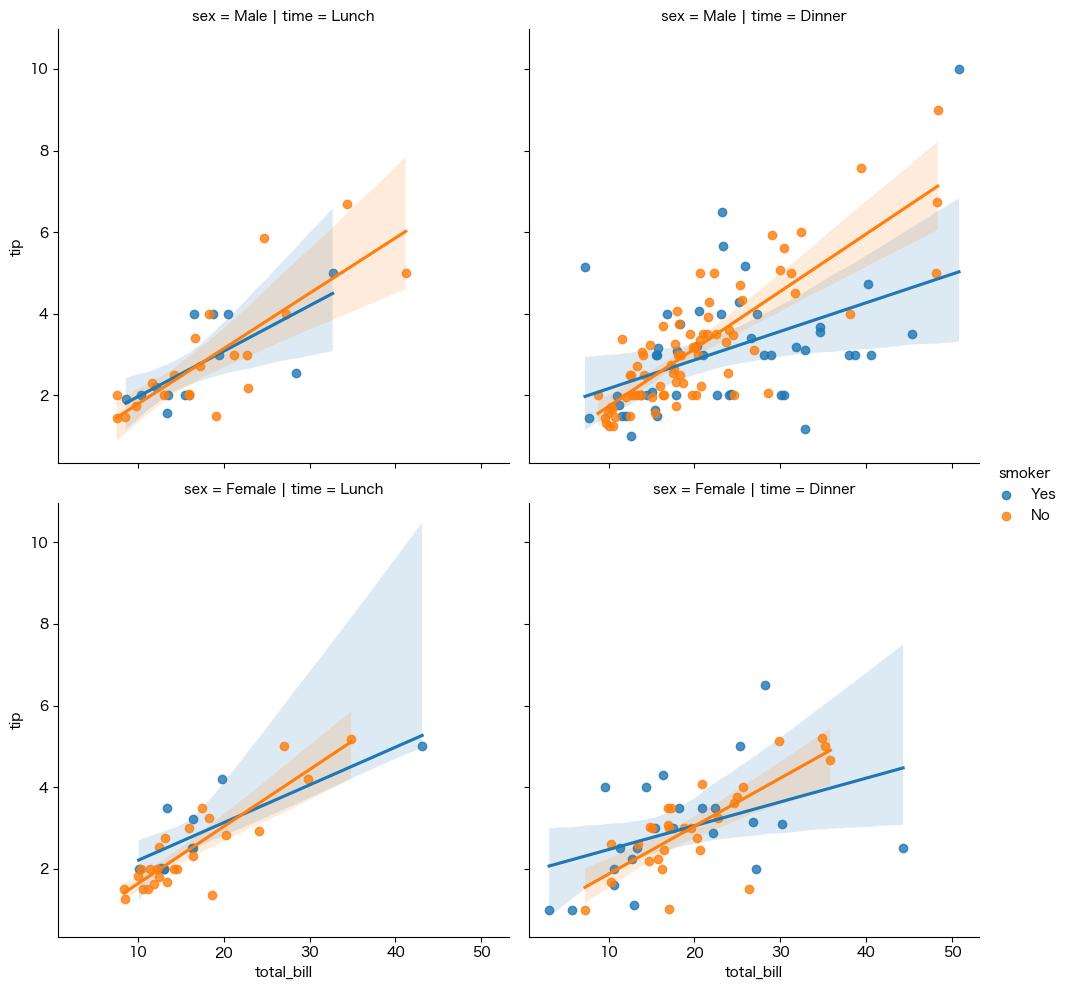

In [8]:
plt.figure(figsize=(6, 6))

sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

plt.show()

<Figure size 600x400 with 0 Axes>

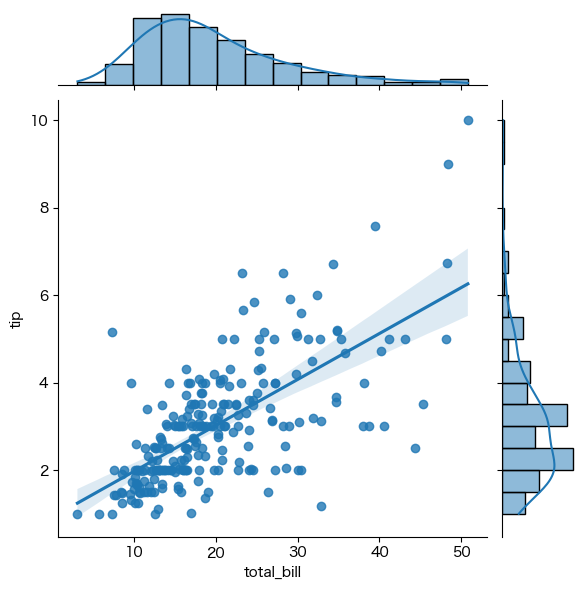

In [9]:
plt.figure(figsize=(6, 4))

ax=sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

plt.show()

### ヒートマップ

<Axes: xlabel='year', ylabel='month'>

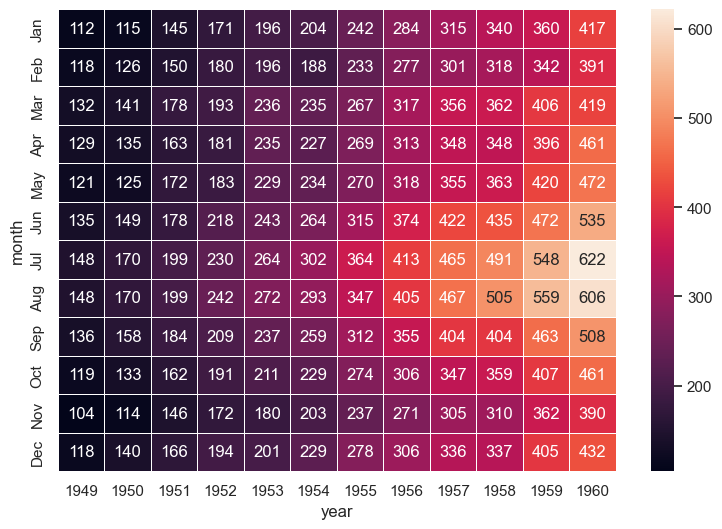

In [27]:
# 航空機のデータを読み込み

flights_long = sns.load_dataset("flights")

# ピボットを生成

flights = (
    flights_long
    .pivot(index="month", columns="year", values="passengers")
)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)


### 相関関係の可視化

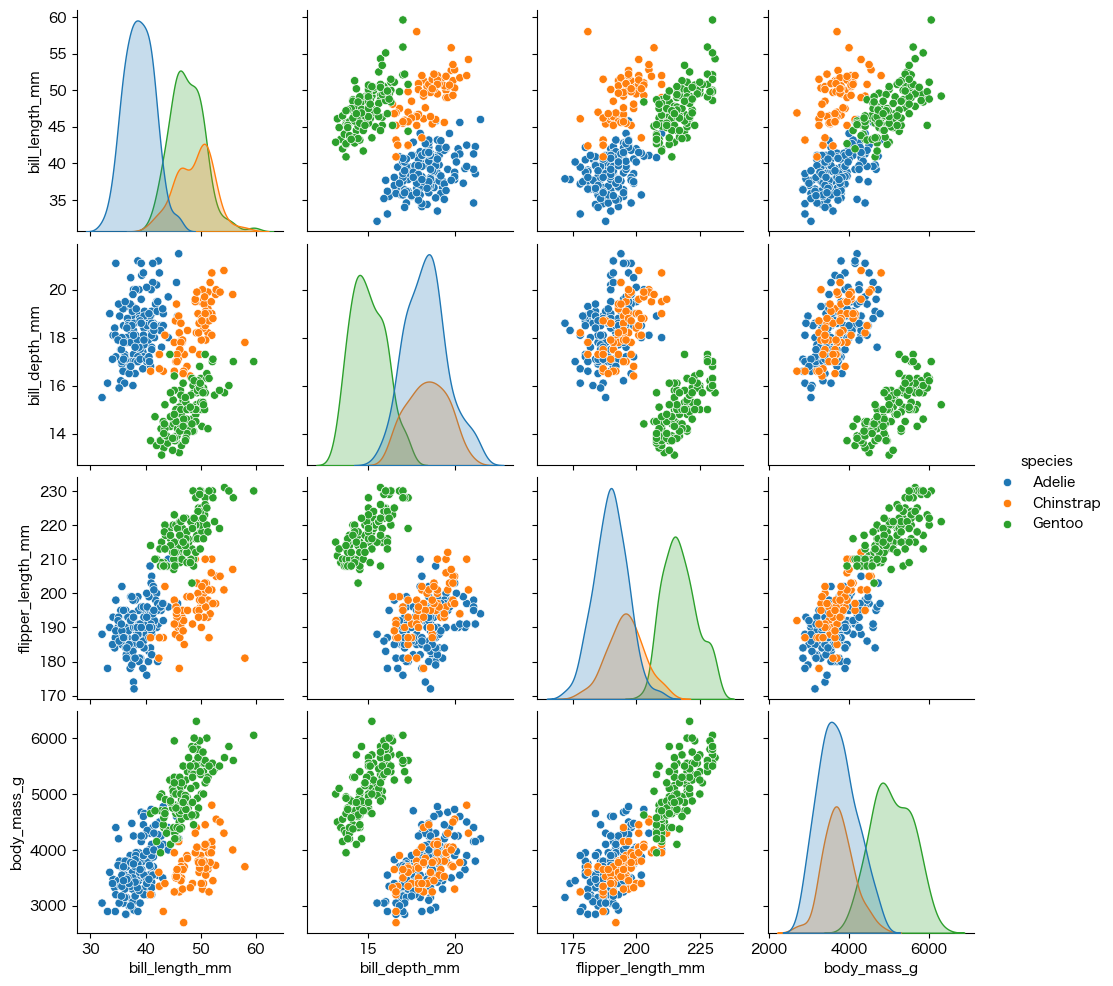

In [11]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, hue="species")

## Plotly

Plotlyは、インタラクティブなグラフを作成するための強力なオープンソースのライブラリです。動的でインタラクティブなグラフを生成できるため、データの視覚化をより深く、豊かに表現することができます。

In [29]:
#!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 100.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [31]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

### Plotlyのモジュール

Plotlyには```plotly.graph_objects```と```plotly.express```という2つの主要なモジュールがあります。

- ```plotly.graph_objects```: より細かい制御やカスタマイズが可能です。グラフの構成要素を個別に設定したり、複雑なグラフを作成する際に使います。
- ```plotly.express```: 高レベルな関数でグラフを作成できます。より簡単に、少ないコードでシンプルなグラフを作成するのに適しています。

In [32]:
import pandas as pd

df = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})


In [33]:
import plotly.express as px

fig = px.bar(df, x="Fruit", y="Number Eaten", color="Contestant", barmode="group")
fig.show()


In [34]:
import plotly.graph_objects as go

fig = go.Figure()
for contestant, group in df.groupby("Contestant"):
    fig.add_trace(go.Bar(x=group["Fruit"], y=group["Number Eaten"], name=contestant,
      hovertemplate="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% contestant))
fig.update_layout(legend_title_text = "Contestant")
fig.update_xaxes(title_text="Fruit")
fig.update_yaxes(title_text="Number Eaten")
fig.show()

### 基本的な使い方

- ```plotly.express```で基本的な図を描画します
- ```fig.update_```でレイアウトなどを細かく設定します

In [44]:
iris = sns.load_dataset('iris')

fig = px.histogram(iris, x='sepal_length', color='species', 
                           nbins=19, range_x=[4,8], width=600, height=350,
                           opacity=0.4, marginal='box')
# histogram描画時にrange_yを指定すると、marginalのboxplotの描画位置が崩れる
fig.update_layout(barmode='overlay')
fig.update_yaxes(range=[0,20],row=1, col=1)
# htmlで保存、以後は省略
# fig.write_html('histogram_with_boxplot.html', auto_open=False)
